# Intro

### Project Overview: Predicting Calories Burned Using Machine Learning

In this project, we will utilize a fitness dataset to develop a machine learning model aimed at predicting the number of calories burned during physical activities. Our approach will involve the following steps:

1. Feature Selection: We will analyze and select relevant features from the dataset that contribute significantly to the prediction of calories burned.
2. Model Development: We will implement three different regression techniques:  
	•	Linear Regression: A foundational algorithm that models the relationship between the selected features and the target variable.  
	•	Decision Tree Regression: A non-linear approach that captures complex relationships through a tree-like model.  
	•	Random Forest Regression: An ensemble method that enhances prediction accuracy by combining multiple decision trees.  
3. Model Validation: We will employ cross-validation techniques to assess the performance of each model, ensuring that our evaluations are robust and reliable.
4. Hyperparameter Tuning: To optimize the performance of our models, we will implement grid search to identify the best hyperparameters for each regression technique.

By the end of this project, we aim to determine the most effective model for predicting calories burned, providing valuable insights into fitness activities.

#### Import Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import joblib



In [2]:
data = pd.read_csv("/Users/alanm/Downloads/gym_members_exercise_tracking.csv")

## Exploratory Data Analysis

#### Dataframe Summary

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

Upon reviewing the dataframe using the info method, it is evident that there are no missing values present. The dataset comprises 15 columns, with the majority of the features being of integer and float types. To incorporate the categorical features into the analysis, one-hot encoding will be applied.

#### Renaming Columns

In [4]:
data.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [5]:
data = data.rename(columns=
            {"Age":"age",
             "Gender":"gender",
             "Weight (kg)":"weight_kg",
             "Height (m)":"height_m",
             'Avg_BPM':"avg_bpm",
             "Max_BPM":"max_bpm",
             "Resting_BPM":"resting_bpm",
             'Session_Duration (hours)': "session_duration_hours",
            'Calories_Burned': "calories_burned",
            'Workout_Type': "workout_type",
         'Fat_Percentage':"fat_percentage",
         'Water_Intake (liters)':"water_intake_liters",
       'Workout_Frequency (days/week)':"workout_frequency",
       'Experience_Level':"experience_level",
         'BMI':"bmi"

             })

In [6]:
data.columns

Index(['age', 'gender', 'weight_kg', 'height_m', 'max_bpm', 'avg_bpm',
       'resting_bpm', 'session_duration_hours', 'calories_burned',
       'workout_type', 'fat_percentage', 'water_intake_liters',
       'workout_frequency', 'experience_level', 'bmi'],
      dtype='object')

#### Missing and Duplicate Values

In [7]:
data.isna().sum()

age                       0
gender                    0
weight_kg                 0
height_m                  0
max_bpm                   0
avg_bpm                   0
resting_bpm               0
session_duration_hours    0
calories_burned           0
workout_type              0
fat_percentage            0
water_intake_liters       0
workout_frequency         0
experience_level          0
bmi                       0
dtype: int64

In [8]:
print(data.duplicated().sum())

0


The dataframe has been thoroughly examined and found to contain no missing or duplicate values.

### Feature Engineering

#### One-Hot Encoding

In [9]:
encoded_data = pd.get_dummies(data[['gender', 'workout_type']]).astype(int)

In [10]:
concatanated_df = pd.concat([data, encoded_data], axis=1)

In [11]:
final_df = concatanated_df.drop(['gender', 'workout_type'], axis=1)
final_df

,age,weight_kg,height_m,max_bpm,avg_bpm,resting_bpm,session_duration_hours,calories_burned,fat_percentage,water_intake_liters,workout_frequency,experience_level,bmi,gender_Female,gender_Male,workout_type_Cardio,workout_type_HIIT,workout_type_Strength,workout_type_Yoga
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,0,1,0,0,0,1
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,1,0,0,1,0,0
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,1,0,1,0,0,0
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,0,1,0,0,1,0
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,87.1,1.74,187,158,67,1.57,1364.0,10.0,3.5,4,3,28.77,0,1,0,0,1,0
969,25,66.6,1.61,184,166,56,1.38,1260.0,25.0,3.0,2,1,25.69,0,1,0,0,1,0
970,59,60.4,1.76,194,120,53,1.72,929.0,18.8,2.7,5,3,19.50,1,0,1,0,0,0
971,32,126.4,1.83,198,146,62,1.10,883.0,28.2,2.1,3,2,37.74,0,1,0,1,0,0


In [12]:
final_df = final_df.drop(['workout_type_HIIT', 'workout_type_Yoga', 'workout_type_Strength', 'workout_type_Cardio', 'experience_level'], axis=1)

In [13]:
final_df

,age,weight_kg,height_m,max_bpm,avg_bpm,resting_bpm,session_duration_hours,calories_burned,fat_percentage,water_intake_liters,workout_frequency,bmi,gender_Female,gender_Male
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,30.20,0,1
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,32.00,1,0
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,24.71,1,0
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,18.41,0,1
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,14.39,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,87.1,1.74,187,158,67,1.57,1364.0,10.0,3.5,4,28.77,0,1
969,25,66.6,1.61,184,166,56,1.38,1260.0,25.0,3.0,2,25.69,0,1
970,59,60.4,1.76,194,120,53,1.72,929.0,18.8,2.7,5,19.50,1,0
971,32,126.4,1.83,198,146,62,1.10,883.0,28.2,2.1,3,37.74,0,1


The gender and workout type columns have been encoded using one-hot encoding to facilitate their inclusion in our machine learning model. These features are deemed essential and should be considered in the model development process.

#### Correlation between Features

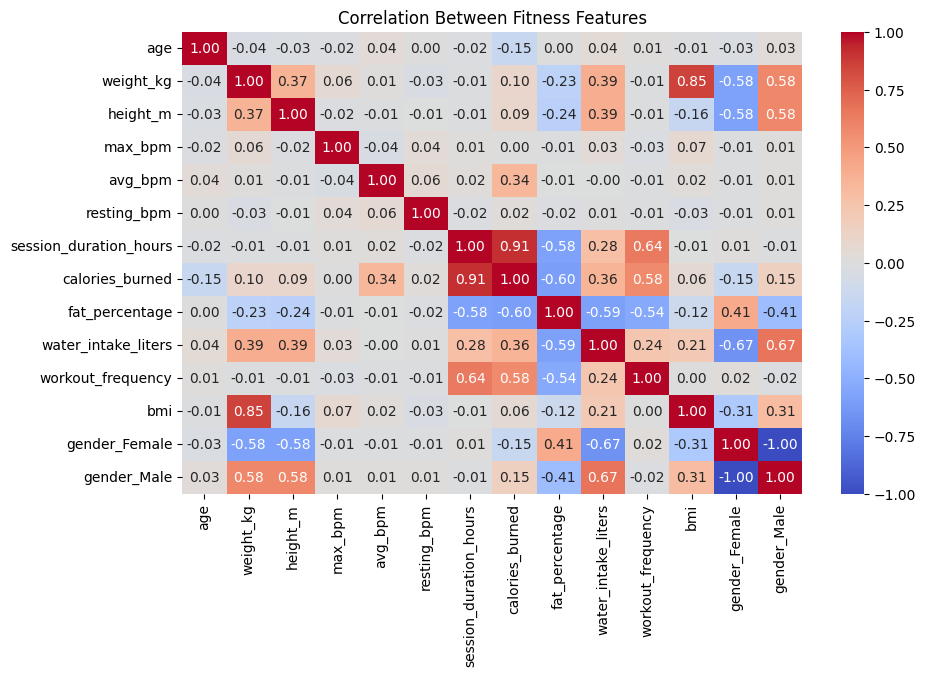

In [14]:
correlation_matrix = final_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Between Fitness Features")
plt.show()




#### Visualizations

After generating a correlation matrix and a corresponding heatmap for improved readability, he strongest correlation is between Calories Burned and Session duration, thats an obvious correlation because the longer you work out, the more calories you burn. It is also evident that the BMI and weight_kg features are closely related. This relationship is expected, as an increase in weight typically correlates with a rise in body mass index (BMI). 

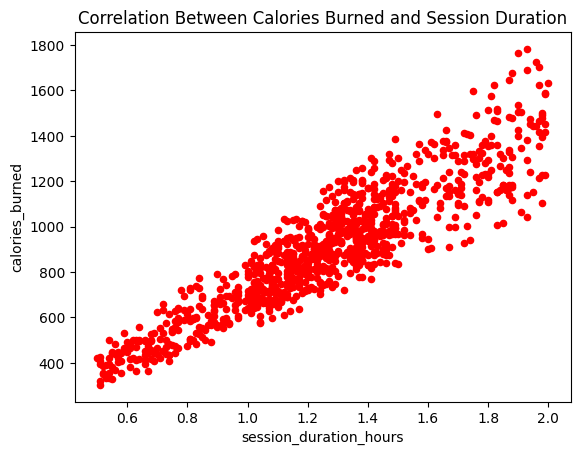

In [15]:
final_df.plot(x='session_duration_hours',
              y='calories_burned',
              kind='scatter',
              color='Red'
)
plt.title("Correlation Between Calories Burned and Session Duration")
plt.show()

With a correlation of .91, you can see that the strongest correlation is between calories burned and session duration in a workout.

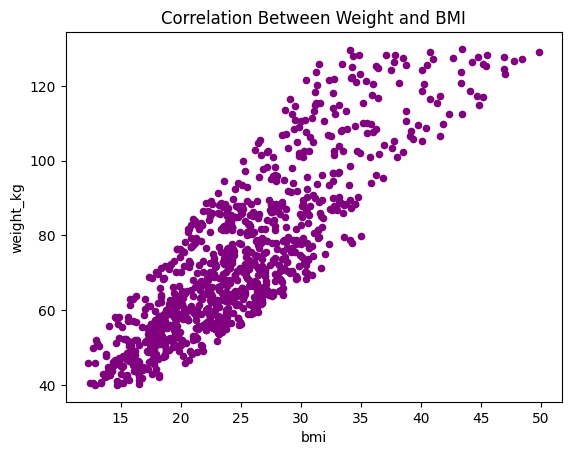

In [16]:
final_df.plot(x='bmi',
              y='weight_kg',
              kind='scatter',
              color='purple'
)
plt.title("Correlation Between Weight and BMI")
plt.show()

In this scatterplot, you can see the positive correlation between Calories bmi and weight_kg features.

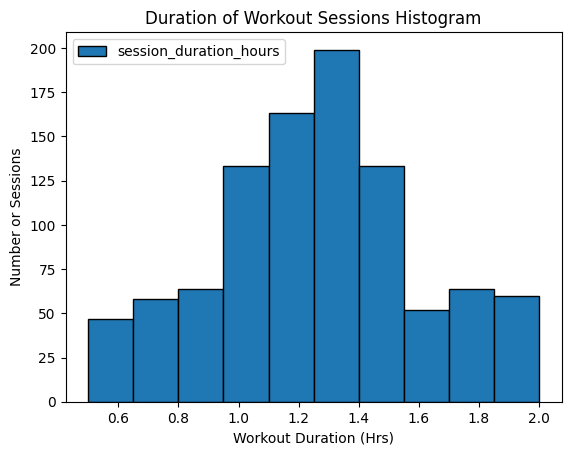

In [17]:
final_df.plot(y='session_duration_hours',
              kind="hist", edgecolor='black')

plt.xlabel("Workout Duration (Hrs)")
plt.ylabel("Number or Sessions")
plt.title("Duration of Workout Sessions Histogram")
plt.show()

Examining the histogram for the duration of workout sessions reveals a bell-shaped distribution, indicating that the mean is concentrated around the center of the data. This suggests a normal distribution, where most of the workout durations cluster around the average value, with fewer instances of exceptionally short or long sessions. This pattern can imply that most individuals tend to engage in workouts of similar durations, which may have implications for understanding typical workout behaviors and tailoring fitness programs accordingly.

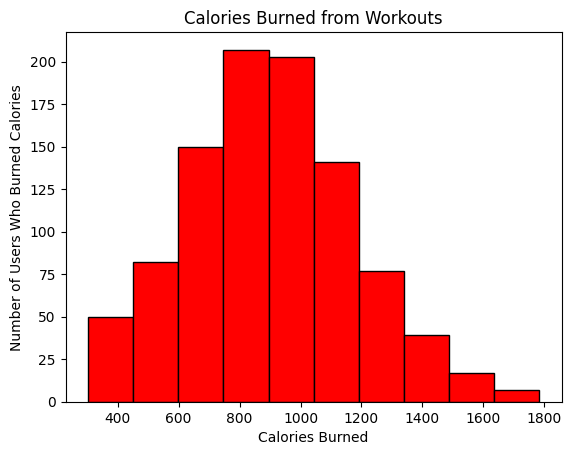

In [18]:
final_df['calories_burned'].plot(
    kind='hist', edgecolor='black', color='red'
)

plt.title("Calories Burned from Workouts")
plt.xlabel("Calories Burned")
plt.ylabel("Number of Users Who Burned Calories")
plt.show()

The data appears to be approximately normally distributed with a slight right skew. Most users burn between 800 and 1000 calories with fewer users at lower and higher extremes. There are some users burning a high number of calores but those cases are rare compared to the majority. 

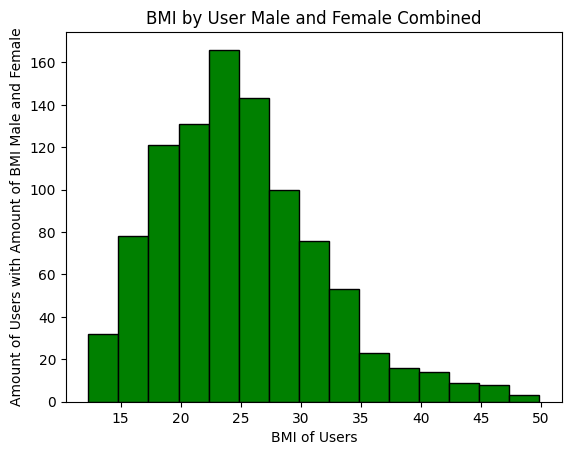

In [19]:
final_df['bmi'].plot(
    kind='hist', edgecolor='black', color='green', bins=15
)

plt.title("BMI by User Male and Female Combined")
plt.xlabel("BMI of Users")
plt.ylabel("Amount of Users with Amount of BMI Male and Female")
plt.show()

This plot displays a nearly normal distribution with a slight right skew. The majority of users have a BMI ranging from 22 to 25, while a smaller number of users, though rare, have a BMI between 35 and nearly 50

## Comparing Males and Females

#### Creating a Male and Female Dataframe

In [20]:
male_df = final_df[final_df['gender_Male'] == 1]
female_df = final_df[final_df['gender_Female'] == 1]

#### Males

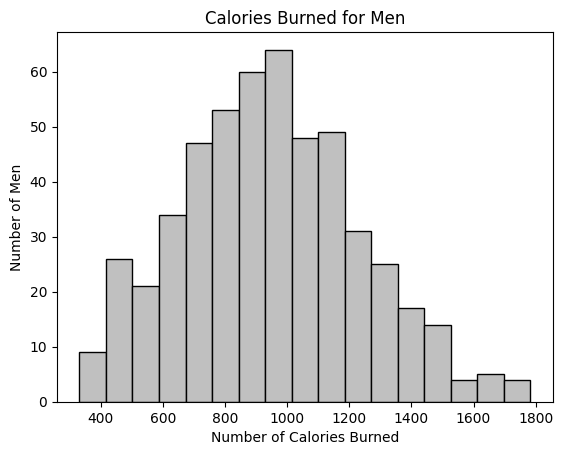

In [21]:
male_df['calories_burned'].plot(
    kind='hist', edgecolor='black', color='silver', bins=17
)
plt.title("Calories Burned for Men")
plt.xlabel("Number of Calories Burned")
plt.ylabel("Number of Men")
plt.show()

After examining the histogram fro calories burned for me, you can ee that it has a normal distribution, with most of the calories burned from 800 - 1000 calories per male in the data. The max calories burned recorded in men is under 1800.

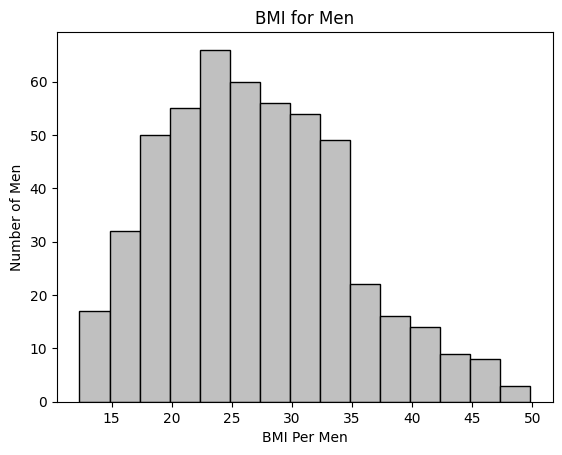

In [22]:
male_df['bmi'].plot(
    kind='hist', edgecolor='black', color='silver', bins=15
)
plt.title("BMI for Men")
plt.xlabel("BMI Per Men")
plt.ylabel("Number of Men")
plt.show()

After creating a visualization for BMI (Body mass Index) in men, you can see that it's slightly skewed to the right, with most of the athletes having a BMI from 23 to 25. You can also observe that there are some users with a Body Mass Index of close to 50.

### Females

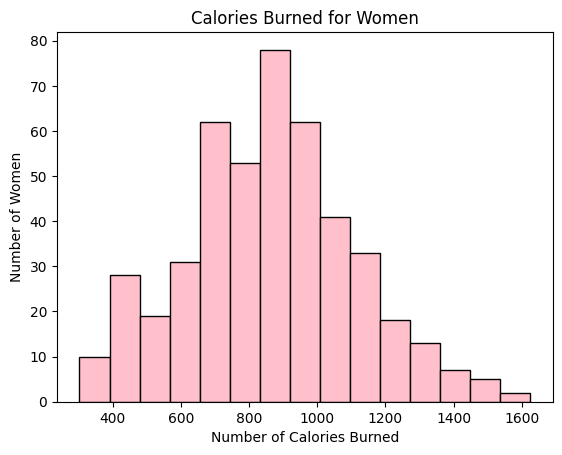

In [23]:
female_df['calories_burned'].plot(
    kind='hist', edgecolor='black', color='pink', bins=15
)
plt.title("Calories Burned for Women")
plt.xlabel("Number of Calories Burned")
plt.ylabel("Number of Women")
plt.show()

Similar to the men, the women have a burning calorie range from 800 - 900. With some women burning more than 1600 calories.

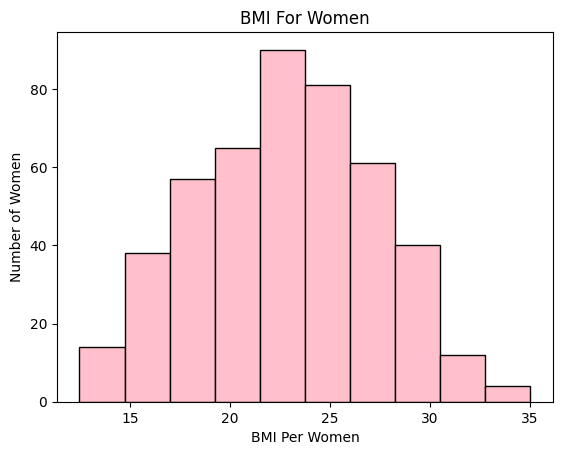

In [24]:
female_df['bmi'].plot(
    kind='hist', edgecolor='black', color='pink'
)
plt.title("BMI For Women")
plt.xlabel("BMI Per Women")
plt.ylabel("Number of Women")
plt.show()

According to the histogram, women have less BMI than men, with a max value of 35 BMI. This would be a normal distributon, since it has a bell shaped curve. Most of the women having a BMI of 23-24.

### Conclusion for Exploratory Data Analysis

In conclusion, the exploratory data analysis (EDA) of the fitness dataset revealed several key insights:

	•	No missing or duplicate values were found, and categorical variables such as gender and workout type were successfully one-hot encoded.
	•	Strong correlations were identified, with the highest correlation being between Calories Burned and Session Duration (0.91). This is an expected relationship since longer workouts tend to burn more calories. Similarly, a strong relationship was found between BMI and weight_kg, reflecting how an increase in weight impacts BMI.
	•	The distribution of session durations showed a bell-shaped curve, indicating a near-normal distribution, with most users completing workout sessions of average duration. This trend suggests that workout behaviors are relatively consistent, which could influence fitness program development.
	•	The calories burned histogram also showed a near-normal distribution, with a slight right skew. Most users burned between 800 to 1000 calories, with fewer outliers at the higher extremes. Men burned up to 1800 calories, while women tended to burn slightly fewer, with a maximum of 1600 calories.
	•	The BMI distributions for both men and women were similarly shaped, with men generally having a higher BMI range (up to 50) compared to women (up to 35), but both distributions followed a normal pattern with slight skewness.

This analysis provides a solid foundation for developing a predictive model for calories burned based on the workout session duration, BMI, and other relevant factors. The identified trends and relationships can also inform the creation of more personalized fitness programs.

## Machine Learning

### Splitting the Data into Train, Valid and Test Sets

In [25]:
features = final_df.drop(['calories_burned'], axis=1)
target = final_df['calories_burned']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=12345)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=12345)


### Scaling the Data

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

#### Linear Regression

In [27]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_prediction = model.predict(X_valid_scaled)
mae = mean_absolute_error(y_valid, y_prediction)
mse = mean_squared_error(y_valid, y_prediction)
r2 = r2_score(y_valid, y_prediction)
print(f"Linear Regression Model Shows a MSE: {mse:.2f}")
print(f"Linear Regression model shows a MAE: {mae:.2f}")
print(f"Linear Regression model shows an R²: {r2:.2f}")

Linear Regression Model Shows a MSE: 1758.71
Linear Regression model shows a MAE: 31.37
Linear Regression model shows an R²: 0.98


#### Decision Tree Regression

In [28]:
model_decision = DecisionTreeRegressor(random_state=12345, max_depth=15, min_samples_split=5, min_samples_leaf=5)
model_decision.fit(X_train_scaled, y_train)
y_prediction_decision = model_decision.predict(X_valid_scaled)
mae_decision = mean_absolute_error(y_prediction_decision, y_valid)
mse_decision = mean_squared_error(y_prediction, y_valid)
r2_decision = r2_score(y_prediction_decision, y_valid)
print(f"Decision Tree Regression MSE: {mse_decision:.2f}")
print(f"Decision Tree Regression MAE {mae_decision:.2f}")
print(f"R2 Score Decision Tree: {r2_decision:.2f}")

Decision Tree Regression MSE: 1758.71
Decision Tree Regression MAE 58.01
R2 Score Decision Tree: 0.92


#### Random Forest Regressor

In [29]:
model_random = RandomForestRegressor(random_state=12345, max_depth=10, n_estimators=500)
model_random.fit(X_train_scaled, y_train)
y_pred_forest = model_random.predict(X_valid_scaled)
mae_forest = mean_absolute_error(y_pred_forest, y_valid)
mse_forest = mean_squared_error(y_pred_forest, y_valid)
r2_forest = r2_score(y_pred_forest, y_valid)
print(f"Decision Tree Regression MSE: {mse_forest:.2f}")
print(f"Decision Tree Regression MAE {mae_forest:.2f}")
print(f"R2 Score Random Forest: {r2_forest:.2f}")

Decision Tree Regression MSE: 2566.50
Decision Tree Regression MAE 37.51
R2 Score Random Forest: 0.96


### Cross-Validation

In [30]:
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
final_score = sum(scores)/ len(scores)
print("average model evaluation score", final_score)
print("Cross-validation scores:", scores)

average model evaluation score 0.9787883387198206
Cross-validation scores: [0.97820509 0.97797023 0.97921669 0.97809451 0.98045517]


### Evaluating Model on Validation and Test Set

Out of the Three models, the best model is the Linear Regression

In [31]:
y_pred_valid = model.predict(X_valid_scaled)
y_pred_test = model.predict(X_test_scaled)

mse_valid = mean_squared_error(y_pred_valid, y_valid)
mae_valid = mean_absolute_error(y_pred_valid, y_valid)
r2_valid = r2_score(y_pred_valid, y_valid)

mse_test = mean_squared_error(y_pred_test, y_test)
mae_test = mean_absolute_error(y_pred_test, y_test)
r2_test = r2_score(y_pred_test, y_test)

print(f"MSE Valid: {mse:.2f}")
print(f"MAE Valid Set: {mae_valid:.2f}")
print(f"R2 Score Validation: {r2_valid:.2f}")
print()

print(f"MSE Test Set: {mse_test:.2f}")
print(f"MAE Test Set: {mae_test:.2f}")
print(f"R2 Score Test Set {r2_test:.2f}")

MSE Valid: 1758.71
MAE Valid Set: 31.37
R2 Score Validation: 0.98

MSE Test Set: 1439.22
MAE Test Set: 28.98
R2 Score Test Set 0.98


### Conclusion

1.	Linear Regression Model:  
	•	Validation Set:  
	•	MSE: 1758.71  
	•	MAE: 31.37  
	•	R²: 0.98  
	•	Test Set:  
	•	MSE: 1439.22  
	•	MAE: 28.98  
	•	R²: 0.98  
	•	Linear regression shows very strong performance with an R² score of 0.98 on both the validation and test sets, indicating that the model explains 98% of the variance in calories burned.  
	
2.	Decision Tree Regressor:  
	•	MSE: 1758.71  
	•	MAE: 58.01  
	•	R²: 0.92  
	•	The decision tree has a lower R² score (0.92), showing it captures slightly less variance in the data compared to linear regression. It also has a higher MAE, indicating less accuracy in predicting individual cases.  

3.	Random Forest Regressor:  
	•	MSE: 2566.50  
	•	MAE: 37.51  
	•	R²: 0.96  
	•	Random Forest outperforms the decision tree model but falls short of the linear regression model, with an R² of 0.96. It provides better accuracy than the decision tree but not as good as linear regression.  

4.	Cross-validation Scores:  
	•	Average cross-validation R²: 0.9788  
	•	The cross-validation scores are consistent, supporting the overall robustness of the models, especially the linear regression model.  

Conclusion:  

The Linear Regression model is the best-performing model in this case. It has the lowest MSE and MAE across both validation and test sets, along with an R² of 0.98, indicating it explains almost all the variance in the target variable (calories burned).  

While the Decision Tree Regressor and Random Forest Regressor models also perform well, their R² scores and error metrics suggest they are not as accurate as linear regression for this specific dataset.  

Given the consistency in the cross-validation scores, linear regression should be the preferred model for predicting calories burned. It offers simplicity, interpretability, and high performance.  

## Saving The Model

In [32]:

joblib.dump(model, 'Calories_Burned_LR_Model.pkl')



['Calories_Burned_LR_Model.pkl']